## Learning with Neural networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn import svm
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

 
<b/> a. Read the data from csv file.
<br/> b. Read selected columns (attributes) and the label as attribute 14.
<br/> c. Form a numpy array
<br/> d. Split into training, testing sets with the data. Use 20% as the testing ratio.
<br/> e. Standardize the continuous attributes. (fit on training and apply on train/test).

In [2]:
##read data from csv file
df1 = pd.read_csv('./Desktop/Dataset/heart.csv')

display (df1.head())

##removes nan and incorrect data
d = df1 ['ca'] != 4
df1 = df1[d]
df1 = df1[df1['thal'] != 0]
print(df1.shape)

##convert pandas to numpy (array)
df = df1.to_numpy()

## Split the data into inputs (X) and output (Y)
X = df[:, :13] 
Y = df[:, -1] 
# print (X.shape)
# print (Y.shape)
print ('_'*50)
print ('X = features')
display (X [0:5])
print ('_'*50)
print ('y = target')
display (Y [0:5])


##split X and Y into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print ( 'train set:' +str (X_train.shape) +'\n' '\n'+  'test set:' +str(X_test.shape))



## standardize the continuous attributes
sc = ss()
X_train = sc.fit_transform(X_train)  #note this also transforms and fits the model.
X_test = sc.transform(X_test)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(296, 14)
__________________________________________________
X = features


array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

__________________________________________________
y = target


array([1., 1., 1., 1., 1.])

train set:(236, 13)

test set:(60, 13)


###  Implement the Neural Network Classifier:
<b/> a. Use a two hidden layer neural network with 128 neurons in each layer with a ‘relu” activation. The input is the 13 standardized attributes as features.
<br/>b. In the output layer, specify a 2 neuron (no heart disease, heart disease) output, with ‘softmax’ activation.
<br/>c. Compile the model, using ‘adam’ optimizer, loss as ‘categorical_crossentropy’, and metrics [‘accuracy’].
<br/>d. Fit (train) the model using the training data for 150 epoch. (Chosen from the loss plots for convergence)
<br/>e. Evaluate the results of the model.

In [3]:
#use these features to the classifier.
#now we have X_train, X_test, y_train, y_test.
#We need to now define the neural networks
from keras import regularizers, optimizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [4]:
#convert to one-hot
train_labels_enc = to_categorical(y_train)
test_labels_enc = to_categorical(y_test)

In [5]:
#parameters for neural net
num_inputs1 = X_train.shape[1] # Total number 0f input variables (per sample)
num_labels1 = train_labels_enc.shape[1] # Total number of output labels - 3.
#one hot encoding: so label 0 is [1 0 0]. label 1 is [0 1 0], label 2 is [0 0 1],
print(test_labels_enc[0:5])

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


### Use a two hidden layer neural network with 128 neurons in each layer with a ‘relu” activation. The input is the 13 standardized attributes as features.


In [6]:
#build neural net model
model = Sequential()  #tf.keras.sequential is different...
model.add(Dense(128, input_shape=(num_inputs1,)))
model.add(Activation('relu'))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01))) 
model.add(Activation('relu'))

### In the output layer, specify a 2 neuron (no heart disease, heart disease) output, with ‘softmax’ activation.    
<b/> c. Compile the model, using ‘adam’ optimizer, loss as ‘categorical_crossentropy’, and metrics [‘accuracy’].

In [7]:

model.add(Dense(num_labels1))
model.add(Activation('softmax'))
model.summary()  #check number of parameters in dense layer is Wx + b, output=# neurons, (param = output * input + output * b)
sgd = optimizers.SGD(lr=0.05)  #optional, define a custom optimizer or just specify optimizer='sgd' or 'adam' in compile()
model.compile(optimizer= 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 18,562
Trainable params: 18,562
Non-trainable params: 0
__________________________________________________

### Fit (train) the model using the training data for 150 epoch. (Chosen from the loss plots for convergence)

In [8]:
history = model.fit(X_train, train_labels_enc, validation_split=0.3, epochs=150)  #you need at least like 300 epoch with a single-layer 10 neuron.
test_loss, test_acc = model.evaluate(X_test,  test_labels_enc, verbose=2)
print('\nTest loss:', test_loss)  
print('\nTest accuracy:', test_acc)

Train on 165 samples, validate on 71 samples
Epoch 1/150
165/165 [==============================] - 0s 2ms/step - loss: 1.9250 - accuracy: 0.5576 - val_loss: 1.8067 - val_accuracy: 0.7324
Epoch 2/150
165/165 [==============================] - 0s 193us/step - loss: 1.6864 - accuracy: 0.8242 - val_loss: 1.6657 - val_accuracy: 0.7465
Epoch 3/150
165/165 [==============================] - 0s 193us/step - loss: 1.5223 - accuracy: 0.8485 - val_loss: 1.5727 - val_accuracy: 0.7465
Epoch 4/150
165/165 [==============================] - 0s 189us/step - loss: 1.4026 - accuracy: 0.8667 - val_loss: 1.4932 - val_accuracy: 0.7746
Epoch 5/150
165/165 [==============================] - 0s 186us/step - loss: 1.3016 - accuracy: 0.8667 - val_loss: 1.4184 - val_accuracy: 0.7746
Epoch 6/150
165/165 [==============================] - 0s 203us/step - loss: 1.2136 - accuracy: 0.8848 - val_loss: 1.3456 - val_accuracy: 0.7746
Epoch 7/150
165/165 [==============================] - 0s 202us/step - loss: 1.1347 - a

Epoch 57/150
165/165 [==============================] - 0s 176us/step - loss: 0.1573 - accuracy: 0.9879 - val_loss: 0.7682 - val_accuracy: 0.8028
Epoch 58/150
165/165 [==============================] - 0s 236us/step - loss: 0.1542 - accuracy: 0.9939 - val_loss: 0.7930 - val_accuracy: 0.7746
Epoch 59/150
165/165 [==============================] - 0s 159us/step - loss: 0.1501 - accuracy: 0.9939 - val_loss: 0.8250 - val_accuracy: 0.7606
Epoch 60/150
165/165 [==============================] - 0s 165us/step - loss: 0.1495 - accuracy: 0.9939 - val_loss: 0.7939 - val_accuracy: 0.7606
Epoch 61/150
165/165 [==============================] - 0s 161us/step - loss: 0.1446 - accuracy: 0.9939 - val_loss: 0.8308 - val_accuracy: 0.7465
Epoch 62/150
165/165 [==============================] - 0s 164us/step - loss: 0.1414 - accuracy: 0.9939 - val_loss: 0.8490 - val_accuracy: 0.7465
Epoch 63/150
165/165 [==============================] - 0s 165us/step - loss: 0.1355 - accuracy: 0.9939 - val_loss: 0.8332 -

165/165 [==============================] - 0s 163us/step - loss: 0.0570 - accuracy: 1.0000 - val_loss: 0.9515 - val_accuracy: 0.7887
Epoch 114/150
165/165 [==============================] - 0s 176us/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 0.9224 - val_accuracy: 0.8028
Epoch 115/150
165/165 [==============================] - 0s 181us/step - loss: 0.0569 - accuracy: 1.0000 - val_loss: 0.9563 - val_accuracy: 0.7746
Epoch 116/150
165/165 [==============================] - 0s 177us/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 0.9578 - val_accuracy: 0.7887
Epoch 117/150
165/165 [==============================] - 0s 188us/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.9447 - val_accuracy: 0.7887
Epoch 118/150
165/165 [==============================] - 0s 169us/step - loss: 0.0526 - accuracy: 1.0000 - val_loss: 0.9375 - val_accuracy: 0.7887
Epoch 119/150
165/165 [==============================] - 0s 156us/step - loss: 0.0521 - accuracy: 1.0000 - val_loss: 0.9560 - val_ac

### Evaluate the results of the model.

The accuracy of the model increases as the iteration (Epoch) increases and the value loss decreases.
The test loss is less than the test accuracy.
The test loss is high because the data set is small

### Print the model.summary(). For the dense_1 layer, verify the number of parameters (Param #) is correct. 

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 18,562
Trainable params: 18,562
Non-trainable params: 0
__________________________________________________

for dense 1 layer,

output = 128
input = 13

param # = (output * input + output * b)

param # = (128 *13) + 128 *1

param # = 1664 + 128 = 1792

### Plot the training cross_entropy loss, the training accuracy with the number of epoch (full iterations over dataset) in the data.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


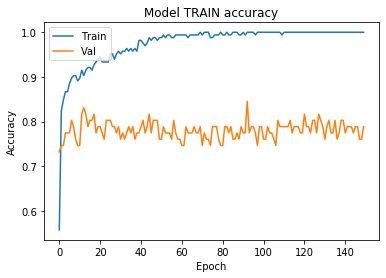

In [10]:
print(history.history.keys())
#Plot it - we can see "convergence" or "not yet...weights are changing a lot still, loss still can go lower"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  #if validation_split>0
plt.title('Model TRAIN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

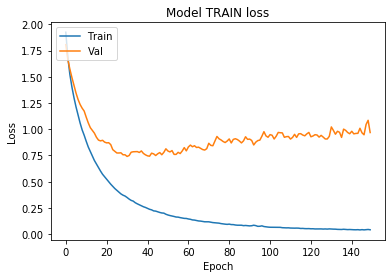

In [11]:
# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) #if validation_split>0
plt.title('Model TRAIN loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### What is the final accuracy and loss on the test set with parameters from 

In [12]:
print('\nTest loss:', test_loss)  
print('\nTest accuracy:', test_acc)


Test loss: 0.7034529288609822

Test accuracy: 0.800000011920929


### Output probabilities and diagnosis of a patient with the following 13 attributes (standardize the data first):
<b/>i. X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2]
ii. X_patient = [56,1,0,112,233,0,1,123,1,2.8,1,1,3]

#### i. X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2]

In [13]:
X_patient = np.array([57,0,1,130,236,0,0,174,0,0,1,1,2]).reshape(1,-1)
X_patient_test = sc.transform(X_patient)
y_pred = model.predict_proba(X_patient_test)
print(y_pred)


[[0.00104994 0.99895006]]


#### ii. X_patient2 = [56,1,0,112,233,0,1,123,1,2.8,1,1,3]

In [14]:
X_patient2 = np.array([56,1,0,112,233,0,1,123,1,2.8,1,1,3]).reshape(1,-1)
X_patient_test2 = sc.transform(X_patient2)
y_pred2= model.predict_proba(X_patient_test2)
print(y_pred2)



[[9.999901e-01 9.856961e-06]]


### Parameters that are modifiable to the analyst in a standard neural network?



The number of layers
The number of neurons
The optimizer could be adam, stochastic gradient descent
Regularization can be done to prevent overfitting
The activation function can also be changed


## Learning with Support Vector Machine

### Data preprocessing: use the same standardized attributes as inputs to the SVM

In [15]:
##split X and Y into train and test set

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=0)

print ( 'train set:' +str (X_train1.shape) +'\n' '\n'+  'test set:' +str(X_test1.shape))



## standardize the continuous attributes
sc = ss()
X_train1 = sc.fit_transform(X_train1)  #note this also transforms and fits the model.
X_test1 = sc.transform(X_test1)
print ('The train set is\n', X_train1[0:2])
print ()
print ('The test set is \n', X_test1[0:2])

train set:(236, 13)

test set:(60, 13)
The train set is
 [[ 0.81598378  0.6758625  -0.01602721 -0.18288705 -0.73990468  2.52487623
  -0.93670306 -0.41721897 -0.66921802 -0.91457718  0.95559244 -0.73688146
  -0.50535408]
 [ 1.03695013  0.6758625  -0.96163231 -0.18288705  0.30879184 -0.39605902
   0.96900317 -1.96122825  1.49428134 -0.73515888 -0.65526339  0.33660017
   1.17441441]]

The test set is 
 [[-0.39933113  0.6758625  -0.96163231  0.52178796  0.99521139 -0.39605902
   0.96900317  1.03856121  1.49428134  0.52076922  0.95559244 -0.73688146
   1.17441441]
 [ 1.03695013  0.6758625  -0.96163231 -0.6526704  -0.01535072 -0.39605902
  -0.93670306 -2.35825921  1.49428134  1.05902411 -2.26611922  0.33660017
  -0.50535408]]


### Implement the Support Vector Machine Classifier:
<b/>a. Use a nonlinear SVM with a radial basis function kernel (gamma='scale', kernel='rbf', probabilities=True)
<br/>b. Fit (train) the model using the training data
<br/>c. Evaluate the results of the model

### a. Use a nonlinear SVM with a radial basis function kernel (gamma='scale', kernel='rbf', probabilities=True)

In [16]:
svm_classifier = svm.SVC(gamma='scale',kernel='rbf', probability=True) 


### b. Fit (train) the model using the training data

In [17]:
svm_classifier.fit(X_train1, y_train1) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
X_train1.shape

(236, 13)

In [19]:
y_train1.shape

(236,)

In [20]:
#predict class of test data
y_pred3 = svm_classifier.predict(X_test1) 
print(y_pred3[0:20])
print(y_test1[0:20])  

[0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.]


### c. Evaluate the results of the model.

In [21]:
print("Number of mislabeled points out of a total %d points : %d"
      % (y_test1.shape[0],(y_test1 != y_pred3).sum()))

Number of mislabeled points out of a total 60 points : 10


The model has 10 misplaced points

### 3. Analysis


#### a. What is the accuracy on the training and test set with parameters from [2. Implement the Support Vector Machine Classifier]?

In [22]:
cm_test = confusion_matrix(y_pred3, y_test1)

y_pred_train = svm_classifier.predict(X_train1)
cm_train = confusion_matrix(y_pred_train, y_train1)

print()
print('Accuracy for training set for SVM = {}'.format((np.trace(cm_train))/len(y_train1)))
print('Accuracy for test set for SVM = {}'.format((np.trace(cm_test))/len(y_test1)))
# print(cm_test)


Accuracy for training set for SVM = 0.923728813559322
Accuracy for test set for SVM = 0.8333333333333334


#### b. Change the SVM to kernel=’linear’, and ‘poly’ and report the training and test accuracy and confusion matrices. 

In [23]:
kernel = ['linear', 'poly']

for k in kernel:
    svm_classifier = svm.SVC(gamma='scale',kernel= k, probability=True)
    svm_classifier.fit(X_train1, y_train1) 
    
    y_pred4 = svm_classifier.predict(X_test1) 
    cm_test2 = confusion_matrix(y_pred4, y_test1)
    
    y_pred_train = svm_classifier.predict(X_train1)
    cm_train2 = confusion_matrix(y_pred_train, y_train1)

    print()
    print ()
    print('Accuracy for training set for SVM when kernel is {}= {}' .format(k, (np.trace(cm_train2))/len(y_train1)))
    print ('The confusion matrix when kernel is '+k +'\n' , cm_train2  )
   
    print('Accuracy for test set for SVM when kernel is {}= {}'.format(k,(np.trace(cm_test2))/len(y_test1)))
    print('The confusion matrix when kernel is '+k +'\n' , cm_test2)
    
    



Accuracy for training set for SVM when kernel is linear= 0.8728813559322034
The confusion matrix when kernel is linear
 [[ 85  11]
 [ 19 121]]
Accuracy for test set for SVM when kernel is linear= 0.8666666666666667
The confusion matrix when kernel is linear
 [[26  2]
 [ 6 26]]


Accuracy for training set for SVM when kernel is poly= 0.9152542372881356
The confusion matrix when kernel is poly
 [[ 87   3]
 [ 17 129]]
Accuracy for test set for SVM when kernel is poly= 0.8
The confusion matrix when kernel is poly
 [[23  3]
 [ 9 25]]


### c. Using the ‘rbf’, ‘linear’, and ‘poly’ kernel, Determine the output probabilities and diagnosis of a patient with the following 13 attributes (standardize the data first):
<b/>i. X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2]
<br/>ii. X_patient = [56,1,0,112,233,0,1,123,1,2.8,1,1,3]

#### i. X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2] 

In [24]:
X_patient = np.array([[57,0,1,130,236,0,0,174,0,0,1,1,2]])  
X_patient_std = sc.transform(X_patient).reshape(1,-1)


In [25]:
kernel = ['rbf', 'linear', 'poly']

for k in kernel:
    svm_classifier = svm.SVC(gamma='scale',kernel= k, probability=True)
    svm_classifier.fit(X_train1, y_train1) 
    
    print()
    probability = svm_classifier.predict_proba(X_patient_std)
    print('probability of X_patient when the kernel is ' +k + '\n', probability) 


probability of X_patient when the kernel is rbf
 [[0.09720444 0.90279556]]

probability of X_patient when the kernel is linear
 [[0.15548813 0.84451187]]

probability of X_patient when the kernel is poly
 [[0.21553511 0.78446489]]


#### ii. X_patient2 = [56,1,0,112,233,0,1,123,1,2.8,1,1,3]

In [26]:
X_patient2 = np.array([[56,1,0,112,233,0,1,123,1,2.8,1,1,3]])  
X_patient_std2 = sc.transform(X_patient2).reshape(1,-1)

In [27]:
kernel = ['rbf', 'linear', 'poly']

for k in kernel:
    svm_classifier = svm.SVC(gamma='scale',kernel= k, probability=True)
    svm_classifier.fit(X_train1, y_train1) 
    
    print()
    probability = svm_classifier.predict_proba(X_patient_std2)
    print('probability of X_patient2 when the kernel is ' +k + '\n', probability) 


probability of X_patient2 when the kernel is rbf
 [[0.9707278 0.0292722]]

probability of X_patient2 when the kernel is linear
 [[0.94990018 0.05009982]]

probability of X_patient2 when the kernel is poly
 [[0.93461595 0.06538405]]


## Part III. Time series classification: Data exploration and Learning with Neural Network

### 1. Data Exploration and Visualization: When starting with an unfamiliar dataset it helps to visualize the training data, explore patterns to help discriminate any labelled classes. 


In [28]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [29]:
##load the train data set
mat = loadmat('./Desktop/DataSet/rawSensorData_train.mat')
print(mat.keys())  # Table 3
print(type(mat['body_gyro_x_train']),mat['body_gyro_x_train'].shape)
bx = mat['body_gyro_x_train']  # this is a numpy array
print('gyroscope x training data shape', bx.shape) #7352,128
mat["total_acc_z_train"]

dict_keys(['__header__', '__version__', '__globals__', 'body_gyro_x_train', 'body_gyro_y_train', 'body_gyro_z_train', 'total_acc_x_train', 'total_acc_y_train', 'total_acc_z_train', 'None', '__function_workspace__'])
<class 'numpy.ndarray'> (7352, 128)
gyroscope x training data shape (7352, 128)


array([[ 0.1029341 ,  0.1056872 ,  0.1021025 , ...,  0.1003852 ,
         0.09987355,  0.09498741],
       [ 0.09792958,  0.09935086,  0.09811381, ...,  0.0935352 ,
         0.08903516,  0.09061235],
       [ 0.09111667,  0.0926756 ,  0.09606378, ...,  0.08301135,
         0.08233391,  0.08148748],
       ...,
       [ 0.1745865 ,  0.2324243 ,  0.2576066 , ...,  0.1112952 ,
         0.1263023 ,  0.1886212 ],
       [ 0.262814  ,  0.2954154 ,  0.3376098 , ...,  0.1289247 ,
         0.1722512 ,  0.2100712 ],
       [ 0.2093865 ,  0.2310711 ,  0.3341906 , ..., -0.156105  ,
        -0.1227979 , -0.08357159]])

In [30]:
##load test data set
mat3 = loadmat('./Desktop/DataSet/rawSensorData_test.mat')
print (mat3.keys())
ax_t = mat3['total_acc_x_test']
print('accelerometer x test data shape', ax_t.shape)

dict_keys(['__header__', '__version__', '__globals__', 'body_gyro_x_test', 'body_gyro_y_test', 'body_gyro_z_test', 'total_acc_x_test', 'total_acc_y_test', 'total_acc_z_test', 'None', '__function_workspace__'])
accelerometer x test data shape (2947, 128)


In [31]:
#obtain the labels. [laying, sitting, climbingstairs, standing, walking] from 1 to 5.
mat2 = loadmat('./Desktop/DataSet/labels.mat')
train_labels = mat2['train_labels']
test_labels = mat2['test_labels']

print('train label shape', train_labels.shape)
#encode/transform so the class starts at 0 to 4 rather than 1 to 5.
dict = {1:0,2:1,3:2,4:3,5:4}
train_labels = np.vectorize(dict.get)(train_labels)
test_labels = np.vectorize(dict.get)(test_labels)
# print(test_labels.shape)

train label shape (7352, 1)


###  Raw time series: Select and make subplots for one training sample of the accelerometer x (128 readings per sample) from each of the 5 classes. 

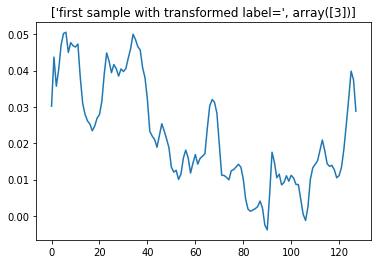

In [32]:

#visualize what one sample looks like, with class label
plt.plot(bx[0,:])
plt.title(['first sample with transformed label=',train_labels[0]])
plt.show()

### Statistical features: Reduce the 128-dimensional attribute into a simple 2-feature input.
<b/>i. Use numpy.mean and numpy.std to obtain the mean and standard deviation for each sample.
<br/>ii. Visualize in 3D, the mean acceleration in (x,y,z) and color-code each sample with the corresponding label. In other words, plot the 7352 points using 3 features (mean_x, mean_y, mean_z).

#### i. Use numpy.mean and numpy.std to obtain the mean and standard deviation for each sample. 

In [33]:

print ('The mean is \n', np.mean(bx, axis=1))
print ('The standard deviation is \n', np.std(bx, axis=1))


The mean is 
 [ 0.02225035  0.01192576 -0.00414954 ... -0.19133331 -0.39039633
 -0.01457843]
The standard deviation is 
 [0.01443409 0.01633397 0.02225643 ... 0.54099643 0.41003567 0.47769263]


In [34]:
features1 = ['total_acc_x_train', 'total_acc_y_train', 'total_acc_z_train']

features2 = ['body_gyro_x_train', 'body_gyro_y_train', 'body_gyro_z_train']

dd=np.zeros((len(mat['total_acc_x_train']), len(features1)*4))

adj=0            
for i,feat_name in enumerate (features1):
    feat = mat[feat_name]  # this is a numpy array
    dd[:,i]=np.mean(feat,axis=1)

adj+=len(features1)
for ii, feat in enumerate(features1):
    feat = mat[feat]
    dd[:,adj+ii]=np.std (feat,axis =1)

adj+=len(features1)    
for i,feat_name in enumerate (features2):
    feat = mat[feat_name]  # this is a numpy array
    dd[:,adj+i]=np.mean(feat,axis=1)

adj+=len(features1)
for ii, feat in enumerate(features2):
    feat = mat[feat]
    dd[:,adj+ii]=np.std (feat,axis =1)

In [35]:
np.equal(dd[:,0],np.array(mat['total_acc_x_train']).mean(axis=1)).all()


True

In [36]:
print(dd.shape)

(7352, 12)


In [37]:
print(dd[0:5])

[[ 1.01930457e+00 -1.24261873e-01  9.97317946e-02  1.79055618e-03
   3.26999813e-03  3.96959918e-03  2.22503516e-02  1.94027691e-02
   9.46815437e-03  1.44340889e-02  1.98283660e-02  5.94323814e-03]
 [ 1.01944797e+00 -1.22935570e-01  9.69394779e-02  1.93191244e-03
   4.93012208e-03  4.91848707e-03  1.19257552e-02 -4.31374182e-03
   6.30757117e-03  1.63339655e-02  1.03560622e-02  7.43068819e-03]
 [ 1.01992651e+00 -1.24996781e-01  9.28967964e-02  2.90398512e-03
   6.45955616e-03  6.14495901e-03 -4.14954219e-03 -1.26400270e-02
   4.33476421e-03  2.22564314e-02  6.92012454e-03  8.75341480e-03]
 [ 1.02034905e+00 -1.30492711e-01  8.76539177e-02  2.57413966e-03
   4.02879253e-03  4.94506251e-03 -1.62283778e-02 -7.69651570e-03
  -3.51901152e-04  9.16504949e-03  7.79282864e-03  8.18648126e-03]
 [ 1.02025534e+00 -1.30208887e-01  8.49988736e-02  1.94864962e-03
   3.87590885e-03  3.63670927e-03 -6.48257872e-03 -1.66435530e-04
  -3.95709159e-03  1.45439892e-02  7.81509270e-03  8.25995203e-03]]


#### ii. Visualize in 3D, the mean acceleration in (x,y,z) and color-code each sample with the corresponding label. In other words, plot the 7352 points using 3 features (mean_x, mean_y, mean_z).

In [38]:
col= ['mean(ax)','mean(ay)','mean(az)','std(ax)','std(ay)','std(az)',
      'mean(bx)','mean(by)','mean(bz)','std(bx)','std(by)','std(bz)']
data = pd.DataFrame(dd, columns = col )
data.loc[:, 'target'] = train_labels
display (data[0:5])

,mean(ax),mean(ay),mean(az),std(ax),std(ay),std(az),mean(bx),mean(by),mean(bz),std(bx),std(by),std(bz),target
0,1.019305,-0.124262,0.099732,0.001791,0.003270,0.003970,0.022250,0.019403,0.009468,0.014434,0.019828,0.005943,3
1,1.019448,-0.122936,0.096939,0.001932,0.004930,0.004918,0.011926,-0.004314,0.006308,0.016334,0.010356,0.007431,3
2,1.019927,-0.124997,0.092897,0.002904,0.006460,0.006145,-0.004150,-0.012640,0.004335,0.022256,0.006920,0.008753,3
3,1.020349,-0.130493,0.087654,0.002574,0.004029,0.004945,-0.016228,-0.007697,-0.000352,0.009165,0.007793,0.008186,3
4,1.020255,-0.130209,0.084999,0.001949,0.003876,0.003637,-0.006483,-0.000166,-0.003957,0.014544,0.007815,0.008260,3


In [39]:
def plot(data):
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    for cls in data.target.unique():
        mask=(data["target"]==cls)
        data_plot=data.loc[mask,:]
        ax.scatter(data_plot['mean(ax)'],data_plot['mean(ay)'],data_plot['mean(az)'],label=cls)
    ax.legend()
    ax.set_xlabel("mean(ax)")
    ax.set_ylabel("mean(ay)")
    ax.set_zlabel("mean(az)")
    ax.set_title("MEAN ACCELERATION")


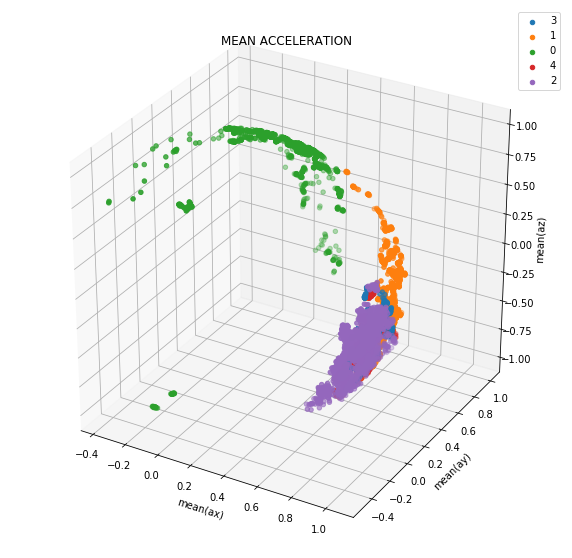

In [40]:
plot(data)

### Data Preparation: The mean/std features are the inputs to our classifier
<b/>a. Stack/combine the [mean, std] for all attributes into a single numpy array with 12 features. Suppose “ax” = accelerometer x, “by” = body gyro y
<br/>Our feature is: [mean(ax),mean(ay),mean(az),std(ax),std(ay),std(az),mean(bx)…std(bz)]
<br/>b. The training and test set is already divided. Repeat on the test set.
<br/>c. Standardize the 12 features (fit on training and apply on train/test).

#### a. Stack/combine the [mean, std] for all attributes into a single numpy array with 12 features. Suppose “ax” = accelerometer x, “by” = body gyro y 
<b/>Our feature is: [mean(ax),mean(ay),mean(az),std(ax),std(ay),std(az),mean(bx)…std(bz)] 

In [41]:
data_copy=data.copy()

In [42]:
data.pop ('target')
print()

In [43]:

display (data[0:5])

,mean(ax),mean(ay),mean(az),std(ax),std(ay),std(az),mean(bx),mean(by),mean(bz),std(bx),std(by),std(bz)
0,1.019305,-0.124262,0.099732,0.001791,0.003270,0.003970,0.022250,0.019403,0.009468,0.014434,0.019828,0.005943
1,1.019448,-0.122936,0.096939,0.001932,0.004930,0.004918,0.011926,-0.004314,0.006308,0.016334,0.010356,0.007431
2,1.019927,-0.124997,0.092897,0.002904,0.006460,0.006145,-0.004150,-0.012640,0.004335,0.022256,0.006920,0.008753
3,1.020349,-0.130493,0.087654,0.002574,0.004029,0.004945,-0.016228,-0.007697,-0.000352,0.009165,0.007793,0.008186
4,1.020255,-0.130209,0.084999,0.001949,0.003876,0.003637,-0.006483,-0.000166,-0.003957,0.014544,0.007815,0.008260


In [44]:
train_data = data.to_numpy() ##convert train data to numpy
print (train_data)

[[ 1.01930457 -0.12426187  0.09973179 ...  0.01443409  0.01982837
   0.00594324]
 [ 1.01944797 -0.12293557  0.09693948 ...  0.01633397  0.01035606
   0.00743069]
 [ 1.01992651 -0.12499678  0.0928968  ...  0.02225643  0.00692012
   0.00875341]
 ...
 [ 0.98534778 -0.21852865 -0.01096064 ...  0.54099643  0.90627827
   0.35427565]
 [ 0.99047763 -0.21577488 -0.02693014 ...  0.41003567  0.9096776
   0.34562018]
 [ 1.00066607 -0.21246879 -0.05768362 ...  0.47769263  0.78146449
   0.37832926]]


#### b. The training and test set is already divided. Repeat on the test set. 

In [45]:
features1 = ['total_acc_x_test', 'total_acc_y_test', 'total_acc_z_test']

features2 = ['body_gyro_x_test', 'body_gyro_y_test', 'body_gyro_z_test']

dd2=np.zeros((len(mat3['total_acc_x_test']), len(features1)*4))

adj=0            
for i,feat_name in enumerate (features1):
    feat = mat3[feat_name]  # this is a numpy array
    dd2[:,i]=np.mean(feat,axis=1)

adj+=len(features1)
for ii, feat in enumerate(features1):
    feat = mat3[feat]
    dd2[:,adj+ii]=np.std (feat,axis =1)

adj+=len(features1)    
for i,feat_name in enumerate (features2):
    feat = mat3[feat_name]  # this is a numpy array
    dd2[:,adj+i]=np.mean(feat,axis=1)

adj+=len(features1)
for ii, feat in enumerate(features2):
    feat = mat3[feat]
    dd2[:,adj+ii]=np.std (feat,axis =1)
    

    
    
np.equal(dd2[:,0],np.array(mat3['total_acc_x_test']).mean(axis=1)).all()


col= ['mean(ax)','mean(ay)','mean(az)','std(ax)','std(ay)','std(az)',
      'mean(bx)','mean(by)','mean(bz)','std(bx)','std(by)','std(bz)']
test_data = pd.DataFrame(dd2, columns = col )
# data.loc[:, 'target'] = train_labels
display (test_data[0:5])

,mean(ax),mean(ay),mean(az),std(ax),std(ay),std(az),mean(bx),mean(by),mean(bz),std(bx),std(by),std(bz)
0,0.993803,-0.267531,0.138710,0.019505,0.009835,0.019915,0.152280,-0.007880,0.045718,0.103101,0.142182,0.030697
1,0.993323,-0.268710,0.140849,0.009345,0.006086,0.013244,0.026941,-0.050997,0.041768,0.066256,0.055685,0.017820
2,0.992927,-0.273769,0.134786,0.003166,0.007331,0.008644,-0.021182,-0.041510,0.030026,0.025122,0.018389,0.013929
3,0.991127,-0.283087,0.131889,0.003101,0.008160,0.009135,-0.029875,-0.023333,0.014165,0.029631,0.020964,0.019917
4,0.990448,-0.290141,0.123383,0.003382,0.005975,0.007692,-0.033330,-0.004688,-0.003396,0.023676,0.018816,0.017797


In [46]:
test_data = test_data.to_numpy() ##convert test data to numpy
print (test_data)

[[ 0.99380341 -0.26753133  0.13870982 ...  0.10310066  0.14218233
   0.03069701]
 [ 0.99332314 -0.26871008  0.14084881 ...  0.06625582  0.05568533
   0.01781963]
 [ 0.99292678 -0.27376935  0.13478558 ...  0.02512222  0.01838936
   0.01392871]
 ...
 [ 0.98068201 -0.23299555 -0.23034264 ...  0.50306871  0.33975469
   0.38923065]
 [ 0.95882454 -0.22529471 -0.23266996 ...  0.28979208  0.34119843
   0.31924067]
 [ 0.94264875 -0.24370317 -0.24704191 ...  0.33420684  0.37673881
   0.33311444]]


#### c. Standardize the 12 features (fit on training and apply on train/test).

In [47]:
train_data = sc.fit_transform(train_data)  #note this also transforms and fits the model.
test_data = sc.transform(test_data)

### Implement the Neural Network Classifier:
<b/>a. Use a two hidden layer neural network with 128 neurons in each layer, followed by ‘relu” activation. The input contains the 12 features (standardized).
<br/>b. In the output layer, specify a N=5 neuron output, with ‘softmax’ activation.
<br/>c. Compile the model, using ‘adam’ optimizer, loss as ‘categorical_crossentropy’, and metrics of [‘accuracy’].
<br/>d. Fit (train) the model using the training [7352, 12] features and train_label for 30 epoch.
<br/>e. Evaluate the results of the model on the [2549,12] test feature and test_label

#### a. Use a two hidden layer neural network with 128 neurons in each layer, followed by ‘relu” activation. The input contains the 12 features (standardized). 

In [48]:
#convert to one-hot
train_labels_enc1 = to_categorical(train_labels)
test_labels_enc1 = to_categorical(test_labels)
# print(test_labels_enc1[50:100])

In [49]:
#parameters for neural net
num_inputs1 = train_data.shape[1] # Total number 0f input variables (per sample)
num_labels1 = train_labels_enc1.shape[1] 
print (train_labels_enc1)
print (num_labels1)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
5


In [50]:
#build neural net model
model = Sequential()  #tf.keras.sequential is different...
model.add(Dense(128, input_shape=(num_inputs1,)))
model.add(Activation('relu'))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01))) 
model.add(Activation('relu'))

#### b. In the output layer, specify a N=5 neuron output, with ‘softmax’ activation. 

In [51]:
print (num_labels1)
model.add(Dense(num_labels1))
model.add(Activation('softmax'))


5


#### c. Compile the model, using ‘adam’ optimizer, loss as ‘categorical_crossentropy’, and metrics of [‘accuracy’]. 

In [52]:
model.summary()  #check number of parameters in dense layer is Wx + b, output=# neurons, (param = output * input + output * b)
# sgd = optimizers.SGD(lr=0.05)  #optional, define a custom optimizer or just specify optimizer='sgd' or 'adam' in compile()
model.compile(optimizer= 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1664      
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 645       
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
Total params: 18,821
Trainable params: 18,821
Non-trainable params: 0
__________________________________________________

#### d. Fit (train) the model using the training [7352, 12] features and train_label for 30 epoch.

In [53]:
print (train_data.shape)
print (train_labels_enc1.shape)
print (test_labels_enc1.shape)

(7352, 12)
(7352, 5)
(2947, 5)


In [54]:
history1 = model.fit(train_data, train_labels_enc1, validation_split=0.3, epochs=30)  
test_loss1, test_acc1 = model.evaluate(test_data,  test_labels_enc1, verbose=2)
print('\nTest loss:', test_loss1)  
print('\nTest accuracy:', test_acc1)

Train on 5146 samples, validate on 2206 samples
Epoch 1/30
5146/5146 [==============================] - 1s 189us/step - loss: 1.1496 - accuracy: 0.8012 - val_loss: 0.6368 - val_accuracy: 0.8672
Epoch 2/30
5146/5146 [==============================] - 1s 125us/step - loss: 0.4596 - accuracy: 0.8817 - val_loss: 0.4376 - val_accuracy: 0.8912
Epoch 3/30
5146/5146 [==============================] - 1s 130us/step - loss: 0.3482 - accuracy: 0.8898 - val_loss: 0.3775 - val_accuracy: 0.8898
Epoch 4/30
5146/5146 [==============================] - 1s 129us/step - loss: 0.3071 - accuracy: 0.9015 - val_loss: 0.4049 - val_accuracy: 0.8513
Epoch 5/30
5146/5146 [==============================] - 1s 122us/step - loss: 0.2810 - accuracy: 0.9046 - val_loss: 0.4203 - val_accuracy: 0.8436
Epoch 6/30
5146/5146 [==============================] - 1s 176us/step - loss: 0.2651 - accuracy: 0.9087 - val_loss: 0.4154 - val_accuracy: 0.8432
Epoch 7/30
5146/5146 [==============================] - 1s 167us/step - loss

#### e. Evaluate the results of the model on the [2549,12] test feature and test_label

In [55]:
y_pred5 = model.predict_proba(test_data)
print(y_pred5[0:5])
print('actual label\n', test_labels_enc1[0:5])
print (y_pred5.shape)

[[7.23098521e-04 9.28206462e-03 3.44025646e-03 9.86511469e-01
  4.31510744e-05]
 [4.65172256e-04 1.09115457e-02 1.75243872e-03 9.86850262e-01
  2.05479882e-05]
 [1.88347811e-04 9.28519107e-03 8.00489215e-04 9.89709437e-01
  1.65023303e-05]
 [6.82734462e-05 4.01710439e-03 4.82543575e-04 9.95418549e-01
  1.35385862e-05]
 [4.33678142e-05 2.77720555e-03 3.69093788e-04 9.96799469e-01
  1.08397935e-05]]
actual label
 [[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
(2947, 5)


### Analysis


#### a. Show the 3D color coded plot of 1.b. What classes are more “separable” or difficult to classify based on this analysis of the accelerometer? 

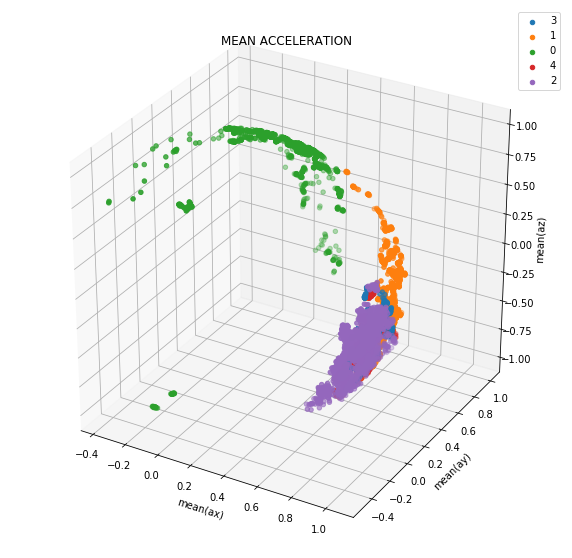

In [56]:
plot (data_copy)

Most Seperable Classes: 0(green), 1 (orange) & 2 (purple)


Least Seperable Classes: 3(blue) & 4(red)

#### b. Plot the training cross entropy loss, the training accuracy with the number of epoch (full iterations over dataset) in the data. 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


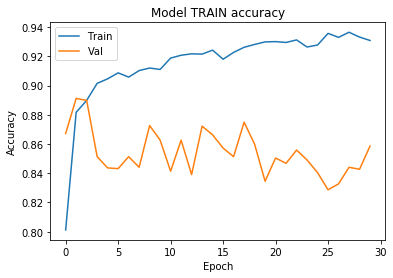

In [57]:
print(history1.history.keys())
#Plot it - we can see "convergence" or "not yet...weights are changing a lot still, loss still can go lower"
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])  #if validation_split>0
plt.title('Model TRAIN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

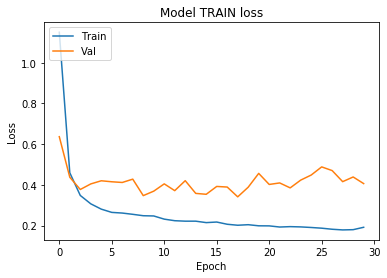

In [58]:
# Plot training & validation loss values
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss']) #if validation_split>0
plt.title('Model TRAIN loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#### c. Output the confusion matrix and accuracy for both training and test data with neural network.

In [59]:
cm_test9 = confusion_matrix(test_labels_enc1.argmax(axis=1), y_pred5.argmax(axis=1))

y_pred_train9 = model.predict_proba(train_data)
cm_train9 = confusion_matrix(train_labels_enc1.argmax(axis=1), y_pred_train9.argmax(axis=1))


print('Accuracy for training set for neural network = {}'.format((np.trace(cm_train9))/len(train_labels_enc1)))
print('The confusion matrix for training set for neural network is\n',cm_train9)

print()

print('Accuracy for test set for neural network = {}'.format((np.trace(cm_test9))/len(test_labels_enc1)))
print('The confusion matrix for test set for neural network is\n', cm_test9)

Accuracy for training set for neural network = 0.9174374319912949
The confusion matrix for training set for neural network is
 [[1407    0    0    0    0]
 [   2 1130    0  153    1]
 [   0    0 1798    0  261]
 [   0  133    0 1241    0]
 [   0    0   57    0 1169]]

Accuracy for test set for neural network = 0.8408551068883611
The confusion matrix for test set for neural network is
 [[537   0   0   0   0]
 [  7 380   1 102   1]
 [  0   0 678   0 213]
 [  0  53   0 478   1]
 [  0   0  91   0 405]]


###  Implement the SVM Classifier


#### a. Use a nonlinear SVM with a radial basis function kernel (gamma='scale', kernel='rbf', probabilities=True) 

In [60]:
svm_classifier2 = svm.SVC(gamma='scale',kernel='rbf', probability=True) 

#### b. Fit (train) the model using the training data (12 features and train_label) 

In [61]:
svm_classifier2.fit(train_data, train_labels.ravel()) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [62]:
test_data.shape

(2947, 12)

#### c. Evaluate the results of the model and test_label.

In [63]:
#predict class of test data
y_pred8 = svm_classifier2.predict(test_data) 
print(y_pred8[0:50])
print(test_labels[0:50].reshape(1,-1))

print (y_pred8.shape)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 1 3 3 3 3]
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(2947,)


In [64]:
print("Number of mislabeled points out of a total %d points : %d"
      % (test_labels.shape[0],(test_labels.reshape(1,-1) != y_pred8).sum()))

Number of mislabeled points out of a total 2947 points : 347


### Analysis

#### a. Output the confusion matrix and accuracy for both training and test data with SVM. 

In [65]:
cm_test8 = confusion_matrix(y_pred8, test_labels)

y_pred_train8 = svm_classifier2.predict(train_data)
cm_train8 = confusion_matrix(y_pred_train8, train_labels)


print('The confusion matrix for train data is \n', cm_train8)
print('Accuracy for training set for SVM = {}'.format((np.trace(cm_train8))/len(train_labels)))

print()

print('The confusion matrix for test data is \n', cm_test8)
print('Accuracy for test set for SVM = {}'.format((np.trace(cm_test8))/len(test_labels)))

The confusion matrix for train data is 
 [[1407    1    0    0    0]
 [   0 1138    0  135    0]
 [   0    0 1923    0  160]
 [   0  147    0 1239    0]
 [   0    0  136    0 1066]]
Accuracy for training set for SVM = 0.9212459194776932

The confusion matrix for test data is 
 [[537   2   0   0   0]
 [  0 383   0  53   0]
 [  0   1 774   0  69]
 [  0 104   0 479   0]
 [  0   1 117   0 427]]
Accuracy for test set for SVM = 0.8822531387852053


#### b. For SVM, which classes of activities are the most difficult and which ones conversely are easy to “classify”? How does this compare with your analysis of data exploration in 1.a. and 1.b? 

I'm going to compare the precision and recall of all classes. the class with the highest precision and recall (f1-score) is the easiest to classify and the least is the hardest to classify

In [66]:
result=metrics.classification_report(test_labels, y_pred8, labels=None, target_names=None, 
                                      sample_weight=None, digits=2, output_dict=False)
print (result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.88      0.78      0.83       491
           2       0.92      0.87      0.89       891
           3       0.82      0.90      0.86       532
           4       0.78      0.86      0.82       496

    accuracy                           0.88      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.89      0.88      0.88      2947



From the analysis above, 
<br/>Class 0, 2 & 3 are the easiest to classify (arranged in ascending order)
<br/>while,
<br/>Class 4 & 1 are the hardest to classify.




#### c. In terms of performance and types of activities (6.b), how does the SVM and neural network compare? Are these activities difficult regardless of algorithm?

The accuracy of SVM is higher than the accuracy of Neural Network in this data set.

<br/>The activities that are easy and difficult to classify in SVM are different, than that of what found in my data exploration.